In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import random
import scipy
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('../../Data/iris_test_data.txt', names=["s_length", "s_width", "p_length", "p_width"], delim_whitespace=True)
df

,s_length,s_width,p_length,p_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [3]:
data = df.values[:, 0:4]
data

array([[5.7, 4.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.6, 3

In [4]:
def kmeans(data, targets, k=3, iters=5,plotdata=None):

    # good initial centroids found upon inspection
    #centroid_indices = np.array([136,130,0])
    #centroid_indices = np.array([63, 53, 48])


    # Comment the above line and uncoment the line below to
    # chooses k random different points from the dataset as intitial centroids

    centroid_indices = random.sample(range(data.shape[0]),k)
    print(centroid_indices)
    centroids =  np.array([data[i] for i in centroid_indices])

    for it in range(iters):
        centroids, classes = compute_centroids(data, centroids)
        plotme(plotdata,classes, centroids, iter=it+1)
        print(classes)
    #plotme(plotdata, targets, centroids, legends=True, clear = True)
    #plt.savefig("classes-known.jpg")
    plt.pause(4)
    plotme(plotdata, classes, iter="Final", clear = True)
    return classes

In [5]:
def euclidian(x1,x2):
    return np.sqrt(sum(np.square(x1-x2)))

def getclass(datapoint, centroids):
    distances = np.array([euclidian(datapoint, centroid) for centroid in centroids])
    return np.argmin(distances)


def compute_centroids(data, centroids):
    classes = np.zeros(data.shape[0])
    # assign each data point to closest centroid
    for i in range(len(data)):
        classes[i] = getclass(data[i], centroids)

    new_centroids = np.ndarray(centroids.shape)

    for i in range(len(centroids)):
        new_centroids[i] = np.mean(data[classes==i],axis=0)


    return new_centroids, classes

def plotme(data, target, centroids=[], legends=False, iter=None,clear=False):
    if clear:
        plt.clf() # Draw the plot each iteration

    # Ref: http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/
    class_1 = data[target==0]
    class_2 = data[target==1]
    class_3 = data[target==2]


    c1 = plt.scatter(class_1[:,0], class_1[:,1],c='r',
            marker='o')	
    c2 = plt.scatter(class_2[:,0], class_2[:,1],c='g',
            marker='o')
    c3 = plt.scatter(class_3[:,0], class_3[:,1],c='b',
            marker='o')

    if centroids!=[]:
        plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='x',s= 150)

    plt.title('Iris dataset with 3 clusters and unknown outcomes : Iter '+str(iter))

    plt.pause(1)


In [6]:
data = df.to_numpy()
pca = PCA(n_components=4).fit(data)
pca_2d = pca.transform(data)
pca_2d

array([[-2.38386932e+00,  1.34475434e+00,  2.83730664e-01,
         1.92618171e-03],
       [-2.59715948e+00,  1.10002193e+00,  1.63581913e-01,
        -9.89580706e-02],
       [-2.64763667e+00,  8.19982633e-01,  2.30585604e-01,
        -2.84808954e-01],
       [-2.64354322e+00,  1.18619490e+00, -1.44505704e-01,
         1.56980962e-01],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.62252620e+00,  8.18089675e-01,  1.45315989e-01,
         1.64740791e-01],
       [ 3.48876538e+00,  1.17154454e+00,  1.29320083e-01,
        -3.11629838e-01],
       [ 3.23234290e+00,  1.37052404e+00, -1.18448777e-01,
        -2.54487344e-01],
       [-2.20883295e+00,  4.42696030e-01,  3.03487809e-01,
        -1.85857530e-01],
       [-2.19907796e+00,  8.79244088e-01, -1.14521465e-01,
         2.53269397e-02],
       [-2.53757337e+00,  5.10367545e-01,  1.71918404e-01,
        -1.92165946e-01],
       [-2.58734619e+00,  5.20473639e-01,  2.19572088e-01,
      

[127, 62, 83]


C:\Users\willa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


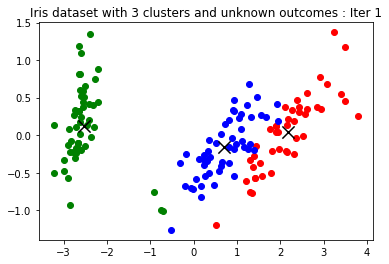

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0.
 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 1. 2. 2. 1. 2. 2.
 1. 1. 0. 2. 2. 2.]


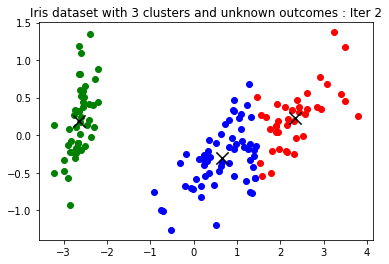

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2.]


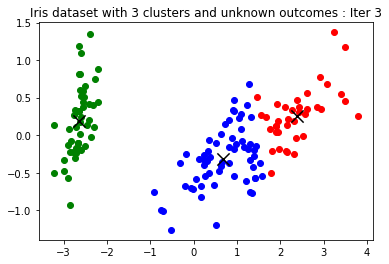

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2.]


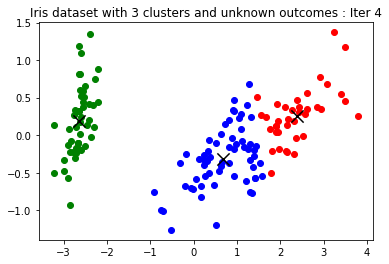

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2.]


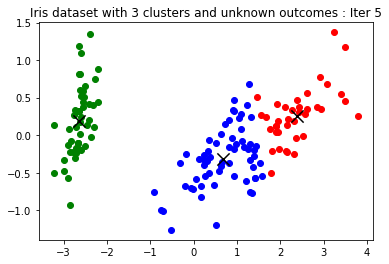

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2.]


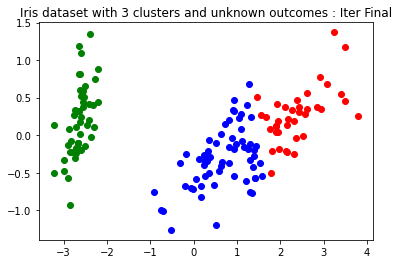

In [7]:
plt.ion() # Interactive on
target = np.array([1,2,3])
y = kmeans(pca_2d, target, k=len(np.unique(target)), plotdata=pca_2d)

In [8]:
#data = y.values.tolist()
#data = y.to_numpy()
pca = TSNE(n_components=2).fit_transform(pca_2d)
#pca_2d = pca.transform(data)

In [9]:
type(pca[1][1])

numpy.float32

[70, 21, 147]


C:\Users\willa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


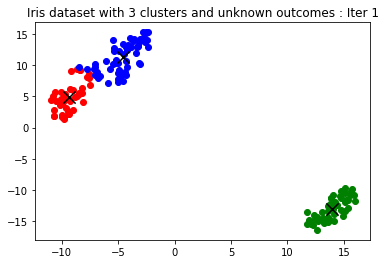

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0.
 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 0. 2. 2. 2.]


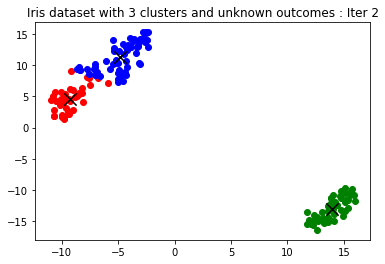

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 0. 2. 2. 2.]


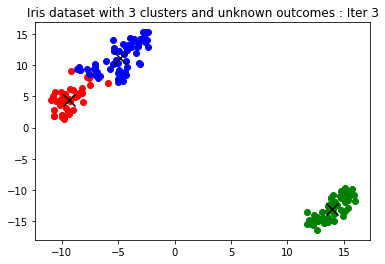

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 0. 2. 2. 2.]


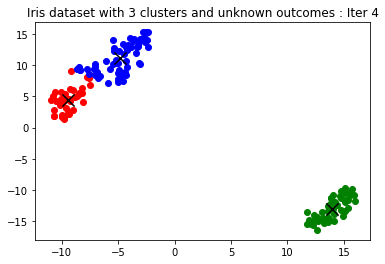

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 0. 2. 2. 2.]


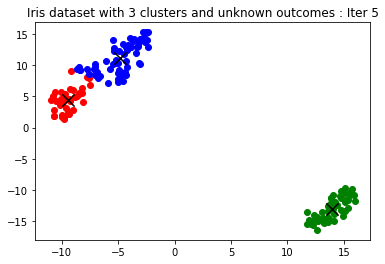

[1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 2.
 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 0. 2. 2. 2.]


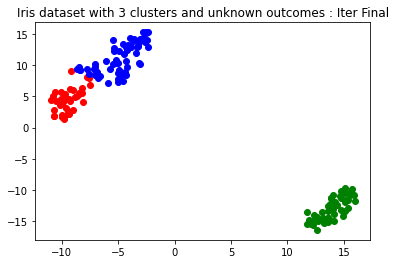

In [10]:
plt.ion() # Interactive on
target = np.array([1,2,3])
y = kmeans(pca, target, k=len(np.unique(target)), plotdata=pca)

In [11]:
y


array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 2., 1., 1., 0., 0., 0., 0., 0., 2., 2., 2., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 2., 2., 2., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 1., 1., 1., 1., 0., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 2., 2.])

In [12]:
type(y)

numpy.ndarray

In [13]:
type(y[1])

numpy.float64

In [14]:
y = y.astype(np.int)

In [15]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2])

In [16]:
for i in range(len(y)):
        y[i]=y[i]+1
y

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1, 1,
       1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3])

In [17]:
df['target'] = pd.Series(y)
df

,s_length,s_width,p_length,p_width,target
0,5.7,4.4,1.5,0.4,2
1,5.5,4.2,1.4,0.2,2
2,5.2,4.1,1.5,0.1,2
3,5.8,4.0,1.2,0.2,2
4,5.4,3.9,1.7,0.4,2
...,...,...,...,...,...
145,4.5,2.3,1.3,0.3,2
146,6.0,2.2,5.0,1.5,1
147,6.2,2.2,4.5,1.5,3
148,6.0,2.2,4.0,1.0,3


In [18]:
np.savetxt(r'../../Data/out7.txt',df['target'],fmt='%d')